# A Game of Lights
## Authors: Grigory Solomatov; Mark Meleka
5-minute summary: https://learnmore.substack.com/p/computer-generated-patterns  
Patterns and in-depth explainer: https://markmeleka.com/lights

In [1]:
import os.path
from pathlib import Path

import matplotlib.cm

In [2]:
def solve(grid_length, mod):
    """
    Takes a size of square matrix, n, a mod, and a cmap.
    Returns a solved matrix
    """
    # For more concise calculations below
    n = grid_length

    # Binary field
    F = GF(mod)

    # Adjacency matrix for the toggle equations
    M = matrix(F, n^2, lambda i,j : (abs(i-j) <= 1 and i//n == j//n)  or abs(i-j) == n)

    # [1,1,...,1] vector with n^2 entries
    v = vector([1]*n^2)

    # Find s such that Ms = v
    s = M.solve_left(v)

    m = matrix(F, n, lambda i,j : s[n*i+j])

    return m


In [3]:
grid_lengths = range(3,71)
mods = [x for x in range(2,71) if is_prime(x)]
cmaps = {}

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmaps['Sequential'] = [
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
    'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
    'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
    'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
    'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = [
    'twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
    'Dark2', 'Set1', 'Set2', 'Set3',
    'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

In [4]:
available_cmaps = matplotlib.cm.datad.keys()

In [5]:
make_plots = False

if make_plots:
    for mod in mods:
        if os.path.isdir(f"mod={mods[mods.index(mod)+1]}"):
            continue
        print(f"Mod: {mod}")
        path_mod = f"plots/mod={mod}"
        Path(path_mod).mkdir(parents=True, exist_ok=True)
        for grid_length in grid_lengths:
            if os.path.isdir(f"{path_mod}/gridlength={grid_length+1}"):
                continue
            print(f"Grid length: {grid_length}")
            path_gl = path_mod + f"/gridlength={grid_length}"
            Path(path_gl).mkdir(parents=True, exist_ok=True)
            try:
                m = solve(grid_length, mod)
            except ValueError:
                print(f"No solution for mod:{mod}, gridlength:{grid_length}")
                continue
            for cmap_category in cmaps:
                path_cmap_category = path_gl + f"/cmap_category={cmap_category}"
                Path(path_cmap_category).mkdir(parents=True, exist_ok=True)
                for cmap in cmaps[cmap_category]:
                    file_path = f"{path_cmap_category}/plot_mod={mod}_gridlength={grid_length}_cmap={cmap}.png"
                    if (cmap not in available_cmaps) or (os.path.isfile(file_path)):
                        continue
                    p = matrix_plot(m, cmap=cmap)
                    p.save(file_path)

## Below are a few random solutions as quick checks.

In [6]:
solve(3, mod=3)

[0 2 0]
[2 2 2]
[0 2 0]

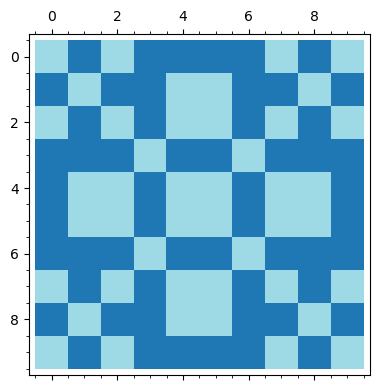

In [7]:
matrix_plot(solve(10, 2), cmap='tab20')

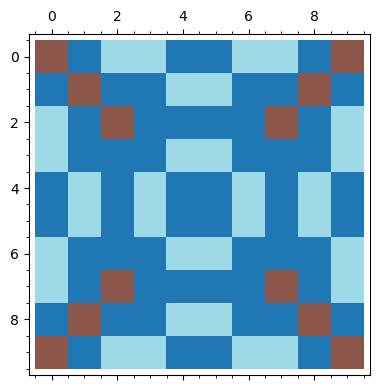

In [8]:
matrix_plot(solve(10, 3), cmap='tab20')

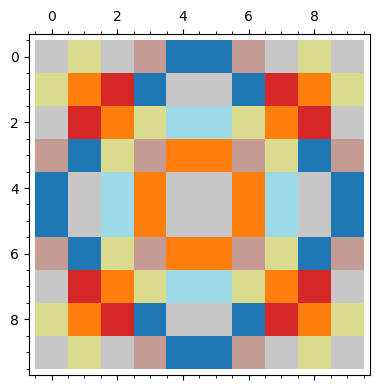

In [9]:
matrix_plot(solve(10, 11), cmap='tab20')

In [10]:
matrix_plot(solve(n=44, mod=11), cmap='tab10')

TypeError: solve() got an unexpected keyword argument 'n'

In [0]:
matrix_plot(solve(n=44, mod=43), cmap='PiYG')

In [0]:
matrix_plot(solve(n=44, mod=503), cmap='YlGn')

In [0]:
matrix_plot(solve(n=42, mod=7919), cmap='YlGn')

In [0]:
matrix_plot(solve(n=42, mod=21269), cmap='YlGn')